# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [110]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [111]:
# Set the API base URL
# I'm using API 2.5, API 3.0 requires subscription and a banking card - I do not want to supply hem my card
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hauterive
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | beyneu
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | merowe
Processing Record 11 of Set 1 | kualakapuas
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | kimberley
Processing Record 15 of Set 1 | sangueya
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | mitchell
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | marudi
City not found. Skipping...
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | isiro
Processing Record 22 of Set 

In [112]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [113]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hauterive,46.0901,3.4459,15.42,85,67,3.06,FR,1727395099
1,edinburgh of the seven seas,-37.0676,-12.3116,13.67,93,98,11.65,SH,1727395100
2,invercargill,-46.4000,168.3500,3.90,93,92,1.34,NZ,1727395101
3,whitehorse,60.7161,-135.0538,9.50,49,40,2.57,CA,1727395102
4,bethel,41.3712,-73.4140,21.93,89,100,0.45,US,1727395104


In [114]:
# Create 'output_data' directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
# Export the City_Data into a csv    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [115]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hauterive,46.0901,3.4459,15.42,85,67,3.06,FR,1727395099
1,edinburgh of the seven seas,-37.0676,-12.3116,13.67,93,98,11.65,SH,1727395100
2,invercargill,-46.4000,168.3500,3.90,93,92,1.34,NZ,1727395101
3,whitehorse,60.7161,-135.0538,9.50,49,40,2.57,CA,1727395102
4,bethel,41.3712,-73.4140,21.93,89,100,0.45,US,1727395104


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

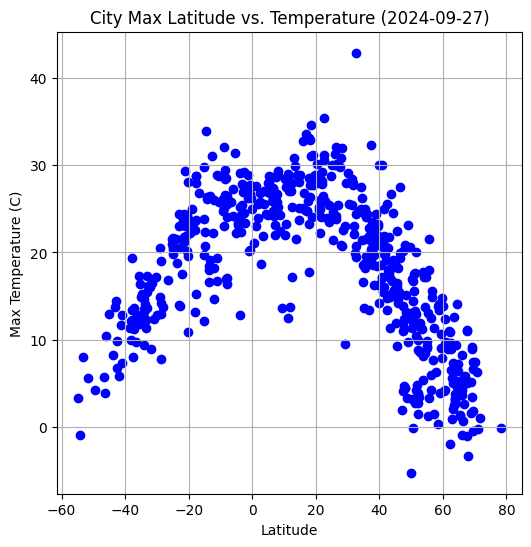

In [116]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b')

# Incorporate the other graph properties
current_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

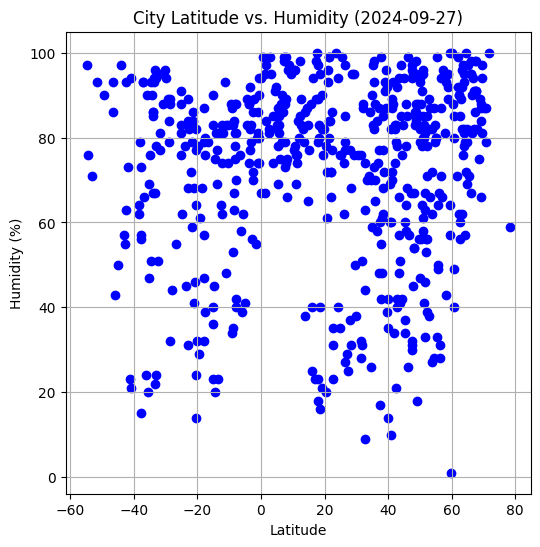

In [117]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

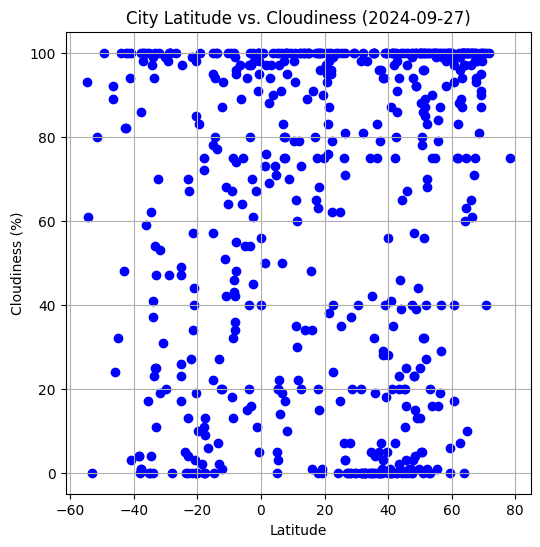

In [118]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

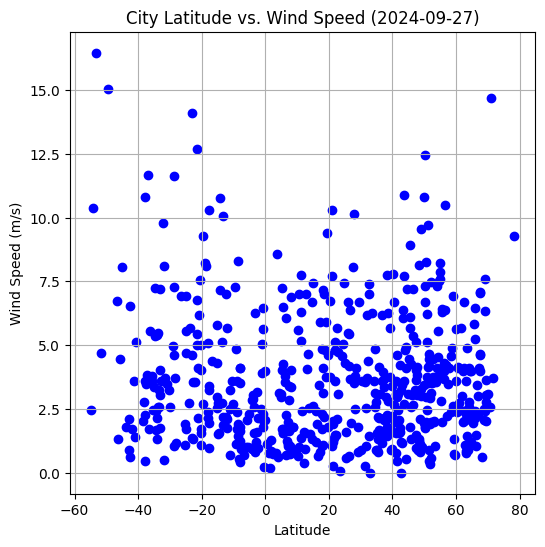

In [119]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [155]:
# Define a function to create Linear Regression plots
def get_linregress(df: pd.DataFrame, x: str, y: str, current_date, title: str, y_axis_measurement = None):
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])

    plt.scatter(df[x], df[y], color='b')

    # Incorporate the other graph properties
    plt.title(f"{title} ({current_date})")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y} ({y_axis_measurement})' if y_axis_measurement is not None else f'{y}')
    
    regression_line = slope * df[x] + intercept
    plt.plot(df[x], regression_line, color='red', label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}')
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    mid_x = (df[x].min() + df[x].max()) / 2
    mid_y = (df[y].min() + df[y].max()) / 2
    plt.annotate(line_eq,(mid_x,mid_y),fontsize=15,color="red")
    
    plt.grid(True)

    # Show plot
    plt.show()
    
    return r_value

In [121]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hauterive,46.0901,3.4459,15.42,85,67,3.06,FR,1727395099
3,whitehorse,60.7161,-135.0538,9.50,49,40,2.57,CA,1727395102
4,bethel,41.3712,-73.4140,21.93,89,100,0.45,US,1727395104
6,beyneu,45.3167,55.2000,11.92,37,11,4.46,KZ,1727395106
9,merowe,18.4833,31.8167,34.56,16,100,7.02,SD,1727395110


In [122]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,13.67,93,98,11.65,SH,1727395100
2,invercargill,-46.4000,168.3500,3.90,93,92,1.34,NZ,1727395101
5,adamstown,-25.0660,-130.1015,21.61,88,47,5.57,PN,1727395105
7,port-aux-francais,-49.3500,70.2167,4.23,90,100,15.03,TF,1727395107
8,mount isa,-20.7333,139.5000,21.87,46,3,6.17,AU,1727395108


###  Temperature vs. Latitude Linear Regression Plot

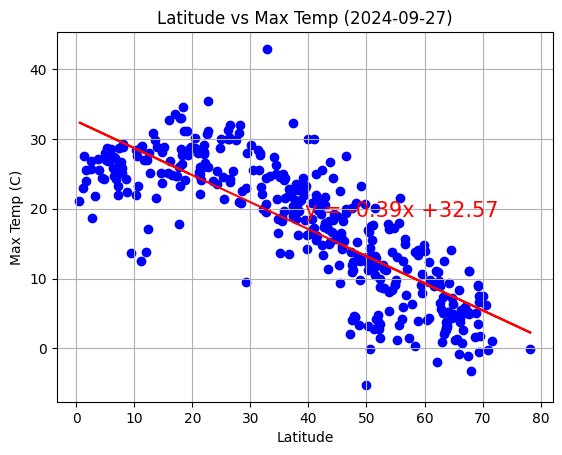

The r^2-value is: 0.6642591510114617


In [157]:
# Linear regression on Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Max Temp', current_date, 'Latitude vs Max Temp', 'C')
print(f'The r^2-value is: {r_value*r_value}')

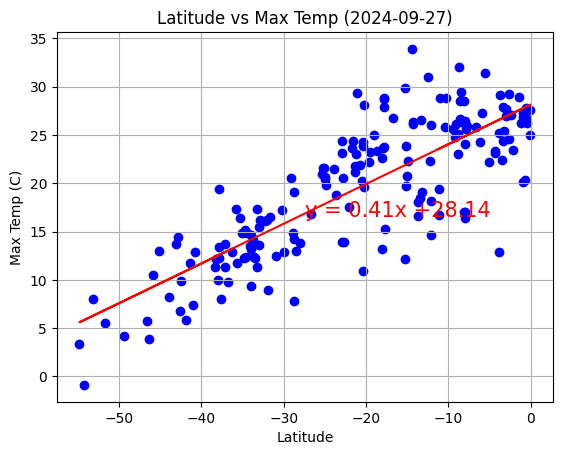

The r^2-value is: 0.6621404834185363


In [156]:
# Linear regression on Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Max Temp', current_date, 'Latitude vs Max Temp', 'C')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression seems to fit the data

### Humidity vs. Latitude Linear Regression Plot

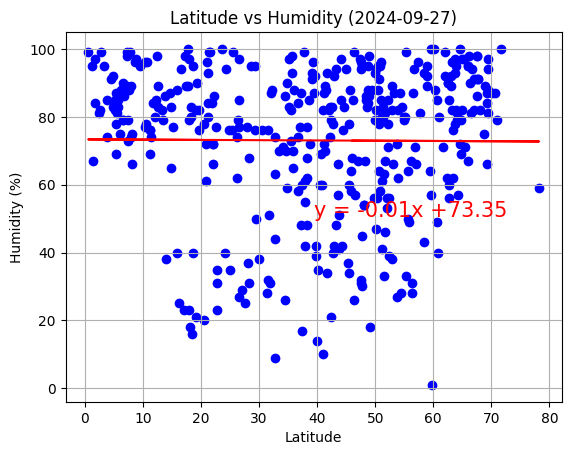

The r^2-value is: 4.765738581855077e-05


In [158]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Humidity', current_date, 'Latitude vs Humidity', '%')
print(f'The r^2-value is: {r_value*r_value}')

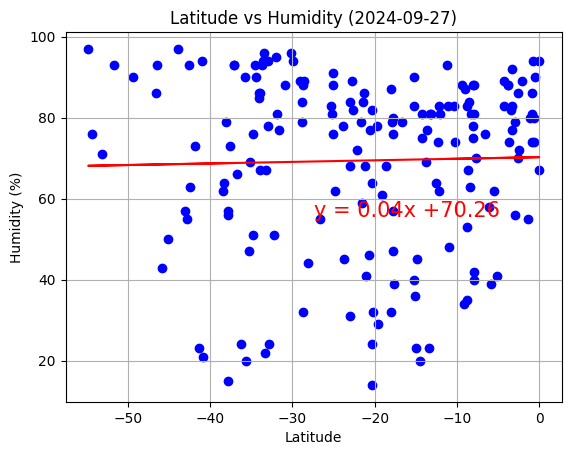

The r^2-value is: 0.000640446043269654


In [159]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Humidity', current_date, 'Latitude vs Humidity', '%')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Humidity vs Latitude

### Cloudiness vs. Latitude Linear Regression Plot

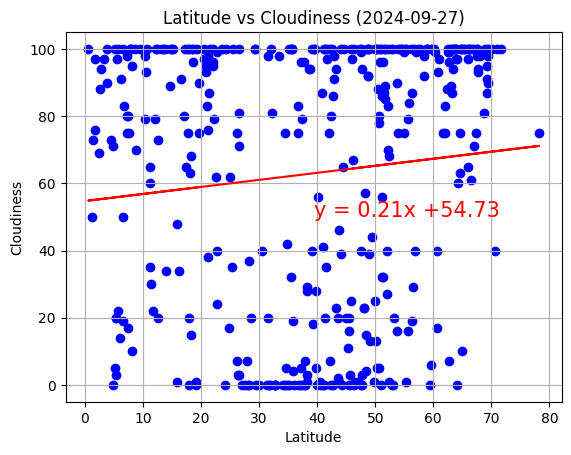

The r^2-value is: 0.010836791827186944


In [160]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Cloudiness', current_date, 'Latitude vs Cloudiness')
print(f'The r^2-value is: {r_value*r_value}')

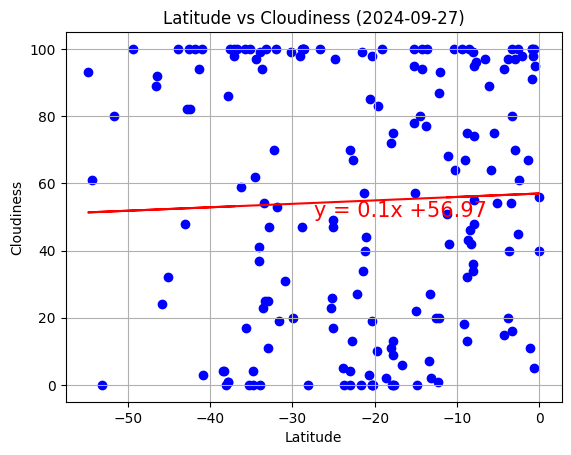

The r^2-value is: 0.0014534406118352767


In [161]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Cloudiness', current_date, 'Latitude vs Cloudiness')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Cloudiness vs Latitude

### Wind Speed vs. Latitude Linear Regression Plot

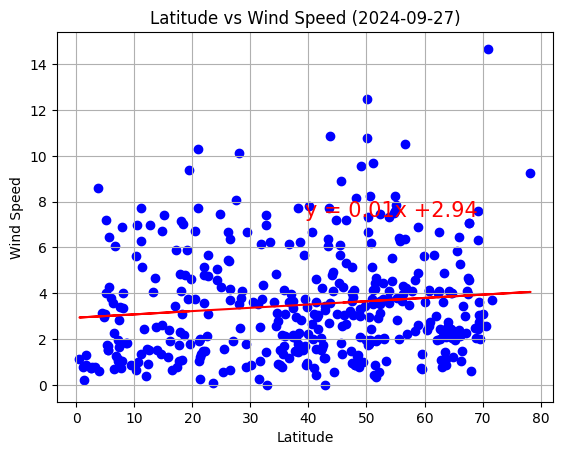

The r^2-value is: 0.013747037186876787


In [162]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Wind Speed', current_date, 'Latitude vs Wind Speed')
print(f'The r^2-value is: {r_value*r_value}')

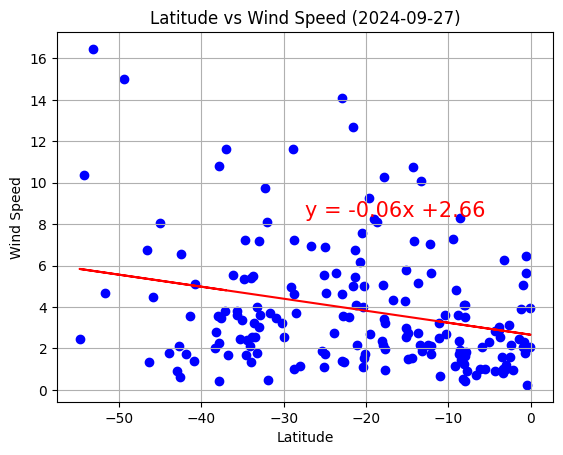

The r^2-value is: 0.07263875748051139


In [163]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Wind Speed', current_date, 'Latitude vs Wind Speed')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Cloudiness vs Latitude